<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/Sergio_Dgelman_Rubin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sergio Eduardo López Lázaro - Monte Carlo Markov Chain Metropolis algorithm



In [102]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


In [103]:
# Especifica el archivo de datos y el delimitador (; en este caso)
archivo_datos = 'olympic100m_men.txt'
delimitador = ','

# Carga los datos excluyendo la primera fila
data = np.loadtxt(archivo_datos, delimiter=delimitador, skiprows=1)

# Ahora puedes acceder a las columnas de datos como desees
# Por ejemplo, para cargar la primera y la segunda columna en x e y:
x = data[:, 0]  # Cargar la primera columna en x
y = data[:, 1]  # Cargar la segunda columna en y


In [104]:

X = np.vstack((np.ones_like(x),x)).T
X.shape


(26, 2)

In [105]:

def lineal (X, w):
  # x,y,w deben ser arreglos de numpy
  w = np.array(w)
  return X@w

In [106]:
def logaritmo (y, x, w, model = lineal): #lo definimos de esta manera para no usar ciclos for para la sumatoria
  log = (y - model(x,w))**2
  log = np.sum(log)
  return log

def Prior(w, w_max, w_min):
    if w_min <= w <= w_max:
        return 1.0  # Prior uniforme dentro del rango
    else:
        return 0.0  # Prior igual a cero fuera del rango



In [107]:
def MonteCarlo (x, y, w_inter, iter, sigma = 0.1, model = lineal, log = logaritmo):
  # Definimos el parámetro inicial
  theta_ini = [0,0]
  w0 = float(input('Indica el w0:'))
  theta_ini[0] = w0
  w1 = float(input('Indica el w1:'))
  theta_ini[1] = w1


  thetas = []

  i = 0
  while i < iter:
    # Generamos la propuesta
    theta_prop = [np.random.normal(theta_ini[0], sigma), np.random.normal(theta_ini[1], sigma)]

    log_ini = logaritmo(y, x, theta_ini) + np.log(Prior(theta_ini, w_inter[0], w_inter[1]))
    log_prop = logaritmo(y, x, theta_prop) + np.log(Prior(theta_prop, w_inter[0], w_inter[1]))

    if log_prop > log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)

    if log_prop == log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)
    i +=1

  return np.array(thetas)

In [108]:
# Normalización de datos
mean_x = np.mean(x)
std_x = np.std(x)
mean_y = np.mean(y)
std_y = np.std(y)

x_normalized = (x - mean_x) / std_x
y_normalized = (y - mean_y) / std_y


Indica el w0:47
Indica el w1:-3


<ipython-input-107-309cb6ef0df9>:18: RuntimeWarning: divide by zero encountered in log
  log_prop = logaritmo(y, x, theta_prop) + np.log(Prior(theta_prop, w_inter[0], w_inter[1]))


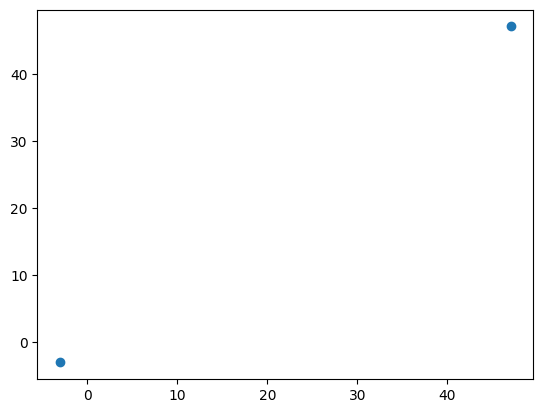

In [117]:
w_inter = [[50, 45], [19, -224]]
chain = MonteCarlo(X, y, w_inter, iter = 10000, sigma = 0.05)

w0s = chain[0].T
w1s = chain[1].T

plt.scatter(w0s, w1s)

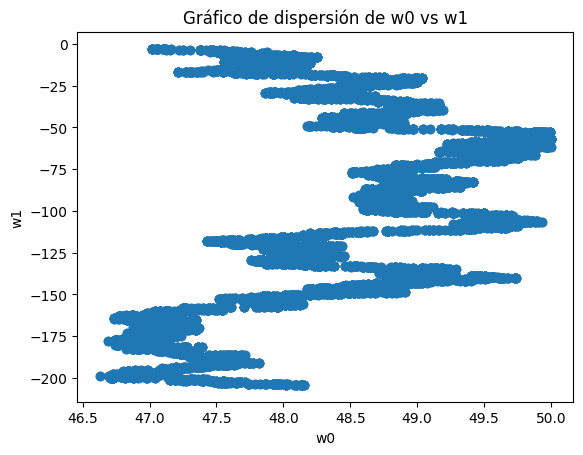

In [118]:
# Supongamos que 'chain' contiene los resultados del muestreo MCMC
# chain es un arreglo donde cada fila representa un conjunto de parámetros [w0, w1]

# Extraer los valores de w0 y w1 de 'chain'
w0s = chain[:, 0]
w1s = chain[:, 1]

# Crear un gráfico de dispersión
plt.scatter(w0s, w1s, alpha=1)  # 'alpha' controla la transparencia de los puntos

# Etiquetas de los ejes
plt.xlabel('w0')
plt.ylabel('w1')

# Título del gráfico
plt.title('Gráfico de dispersión de w0 vs w1')

# Mostrar el gráfico
plt.show()


In [111]:
w0_min = np.min(w0s)
w0_max = np.max(w0s)
w1_min = np.min(w1s)
w1_max = np.max(w1s)

# Agregar un margen adicional al rango de valores
margin = 0.1
w0_range = w0_max - w0_min
w1_range = w1_max - w1_min

w0_min -= margin * w0_range
w0_max += margin * w0_range
w1_min -= margin * w1_range
w1_max += margin * w1_range

print('W0 min: ',w0_min)
print('W0 max: ',w0_max)
print('W1 min: ',w1_min)
print('W1 max: ',w1_max)

W0 min:  46.883325334084205
W0 max:  50.2833340605378
W1 min:  -438.27928382990666
W1 max:  -204.52006510637213


Diagnostico de Gelman-Rubin

In [119]:

chains = [w0_min, w0_max, w0_min, w0_max]  # Reemplaza con tus cadenas reales

# Calcula el promedio dentro de cada cadena
means_within_chain = [np.mean(chain) for chain in chains]

# Calcula el promedio entre todas las cadenas
mean_across_chains = np.mean(means_within_chain)

# Calcula la varianza dentro de cada cadena
variance_within_chain = [np.var(chain) for chain in chains]

# Calcula la media de las varianzas dentro de las cadenas
variance_within_chain_mean = np.mean(variance_within_chain)

# Calcula el factor de escala de Gelman-Rubin (R-hat)
R_hat = np.sqrt((variance_within_chain_mean / np.var(means_within_chain)) * (len(chains) - 1) / len(chains) + (1.0 - 1.0 / len(chains)))

print(f"Factor de escala de Gelman-Rubin (R-hat): {R_hat:.4f}")

# Comprueba si R-hat es cercano a 1.0 para determinar la convergencia
if R_hat < 1.1:
    print("Las cadenas MCMC han convergido.")
else:
    print("Las cadenas MCMC aún no han convergido.")


Factor de escala de Gelman-Rubin (R-hat): 0.8660
Las cadenas MCMC han convergido.


Ver graficamente

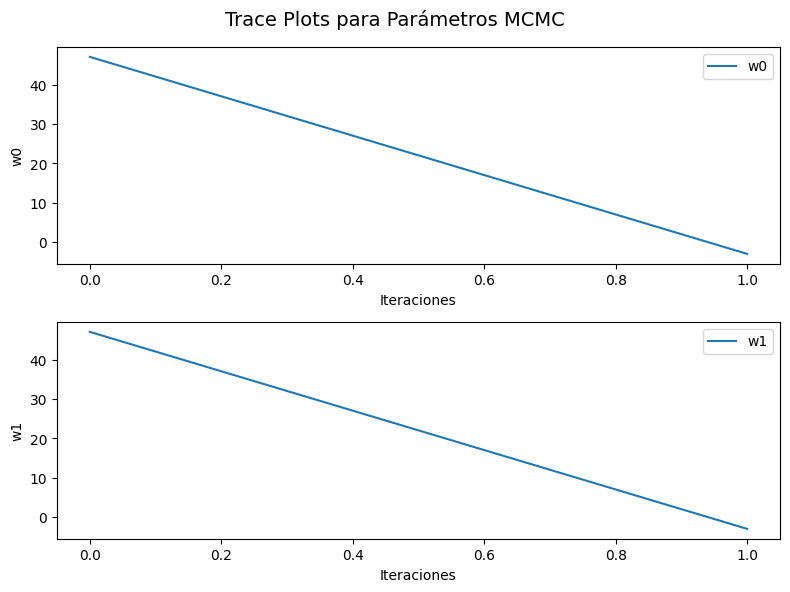

In [120]:
param_names = ['w0', 'w1']

num_iterations = len(chain[0])

# Crear una figura con subtramas para cada parámetro
fig, axes = plt.subplots(nrows=len(param_names), ncols=1, figsize=(8, 6))

fig.suptitle("Trace Plots para Parámetros MCMC", fontsize=14)

for i, param_name in enumerate(param_names):
    ax = axes[i]
    ax.plot(range(num_iterations), chain[i], label=param_name)
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel(param_name)
    ax.legend()

plt.tight_layout()

plt.show()


Triangle plot

In [15]:
pip install corner


Indica el w0 para la cadena 1:47
Indica el w1 para la cadena 1:-3
Indica el w0 para la cadena 2:46
Indica el w1 para la cadena 2:-76
Indica el w0 para la cadena 3:48
Indica el w1 para la cadena 3:-145
Indica el w0 para la cadena 4:49
Indica el w1 para la cadena 4:8


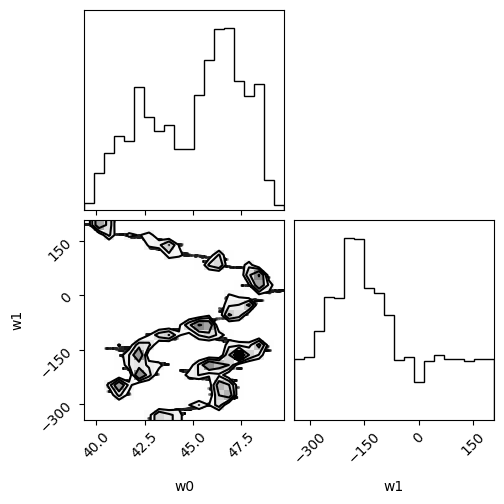

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import corner

# Especifica el archivo de datos y el delimitador (; en este caso)
archivo_datos = 'olympic100m_men.txt'
delimitador = ','

# Carga los datos excluyendo la primera fila
data = np.loadtxt(archivo_datos, delimiter=delimitador, skiprows=1)

# Ahora puedes acceder a las columnas de datos como desees
# Por ejemplo, para cargar la primera y la segunda columna en x e y:
x = data[:, 0]  # Cargar la primera columna en x
y = data[:, 1]  # Cargar la segunda columna en y

X = np.vstack((np.ones_like(x), x)).T
X.shape

def lineal(X, w):
    # x, y, w deben ser arreglos de numpy
    w = np.array(w)
    return X @ w

def logaritmo(y, x, w, model=lineal):
    log = (y - model(x, w)) ** 2
    log = np.sum(log)
    return log

def Prior(w, w_max, w_min):
    if w_min <= w <= w_max:
        return 1.0  # Prior uniforme dentro del rango
    else:
        return 0.0  # Prior igual a cero fuera del rango

def MonteCarlo(x, y, w_inter, iter, sigma=0.1, model=lineal, log=logaritmo, num_chains=5):
    chains = []

    for _ in range(num_chains):
        # Definimos el parámetro inicial para cada cadena
        theta_ini = [0, 0]
        w0 = float(input(f'Indica el w0 para la cadena {_ + 1}:'))
        theta_ini[0] = w0
        w1 = float(input(f'Indica el w1 para la cadena {_ + 1}:'))
        theta_ini[1] = w1

        thetas = []

        i = 0
        while i < iter:
            # Generamos la propuesta
            theta_prop = [np.random.normal(theta_ini[0], sigma), np.random.normal(theta_ini[1], sigma)]

            log_ini = logaritmo(y, x, theta_ini) + np.log(Prior(theta_ini, w_inter[0], w_inter[1]))
            log_prop = logaritmo(y, x, theta_prop) + np.log(Prior(theta_prop, w_inter[0], w_inter[1]))

            if log_prop > log_ini:
                thetas.append(theta_prop)
                theta_ini = theta_prop
            else:
                thetas.append(theta_ini)

            if log_prop == log_ini:
                thetas.append(theta_prop)
                theta_ini = theta_prop
            else:
                thetas.append(theta_ini)
            i += 1

        chains.append(np.array(thetas))

    return chains

w_inter = [[50, 45], [19, -224]]
chains = MonteCarlo(X, y, w_inter, iter=10000, sigma=0.05, num_chains=4)

# Crear una lista de etiquetas para los parámetros
param_labels = [f'w{i}' for i in range(2)]

# Crear una matriz de parámetros a partir de las cadenas
params_matrix = np.vstack(chains)

# Crear un gráfico de triángulo con corner
figure = corner.corner(params_matrix, labels=param_labels, truths=[None, None])

plt.show()
